# Class 18: Statistical Inference and Hypothesis Testing

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Class 18 Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Define statistical inference to a freshman engineer. Give two science or engineering examples.
* Explain the central limit theorem.
* Use the central limit theorem to calculate probabilities involving the sample mean. Do this with and without standardizing. (Two approaches, same answer.)
* Explain the correct interpretation of a 95% confidence interval.
* Using a picture, explain the 68-95-99.7 to someone that just finished Calculus II.
* Calculate any size confidence interval (95%, 99%, etc.) using z- or t-distribution
 * Explain why the t-distribution is important. Relate this back to the CLT.
 * Check for the assumption required to apply the t-distribution
 * Use a confidence interval to perform hypothesis testing
* Apply the 5-step hypothesis testing procedure
 * Identify null and alternative hypotheses from a problem description
 * Calculate test statistic
 * Draw "area under curve" that corresponds to P-value for a given set of hypotheses


In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## 18d. Standardized Normal Distribution

How could be answer the above question is we did not have access to Python? In other words, how did people do statistical analysis with simple calculators?

The core problem is that the integral for the cumulative distribution function (CDF) for the Gaussian (normal) distribution does not have an analytic solution.

$$
F(a) = \int_{-\infty}^{a} f(x ~|~ \mu, \sigma^2) dx
$$

$$
F(a) = \int_{-\infty}^{a} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2 \sigma^2}} dx
$$

This integral is calculated numerically. Virtually all statistics textbooks contain tables of computed values for the standard normal distribution, i.e., $\mathcal{N}(0,1)$.

Here is an example: http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf

You can convert any normal distribution to use these tables by **standardizing**:

$$
z = \frac{x - \mu}{\sigma}
$$

Here $z$ is sometimes called a $z$-score.

In [11]:
z = (0.5 - ev)/(math.sqrt(var))
print(z)

-0.1518156033561421


We then look up the probability $P(Z < -0.15) = 0.44$, which matches our result above. We will use Python in this class, but you should know these tables exist.

**Exam Practice**: Show that if $X \sim \mathcal{N}(\mu,\sigma^2)$ and $Z = \frac{X - \mu}{\sigma}$ then $Z \sim \mathcal{N}(0,1)$. Hint: Treat $\mu$ and $\sigma$ as constants.

## 18e. Motivating Example: Catalyst Life

Imagine this summer you have an internship at a specialty chemical company. You are tasked with testing a new catalyst. You receive 25 test samples of catalyst. You record the number of hours of operation before each test sample experiences a substantial decrease in yield (i.e., fails). Below are the data.

In [12]:
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

With these data, you can use statistics to ask two fundamental questions:
1. What is the population mean lifetime? (We want an uncertainty range.)
2. Is this sample of 25 catalysts with the manufactures promised specifications?

Lifetime Average: 6.064 hours
Lifetime Standard Deviation: 2.7185113573424697 hours


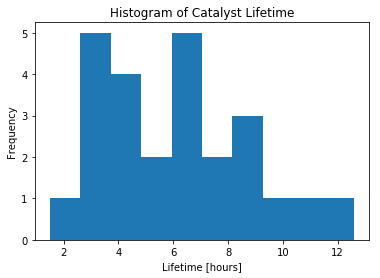

In [13]:
# Make a histogram
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")

# Compute the mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

print("Lifetime Average: {} hours".format(xbar))
print("Lifetime Standard Deviation: {} hours".format(s))